### Do developmental and IR GSCs exhibit different levels of mTORC1 activation?
IR GSCs exhibit significantly greater mTORC1 activity compared to developmental GSCs (T-statistic: -6.045364492639873, P-value: 3.7301145290978145e-08)

In [3]:
import pandas as pd

# Read in gsva_results
gsva_results_df = pd.read_csv('C:/research/GSC_RNAseq_and_metabolomics_analysis/gsva_results.csv', index_col=0)
# Read in metadata
bulk_meta_df = pd.read_csv('bulk_meta_compiled.csv', index_col=0)

print(gsva_results_df.head())
print(bulk_meta_df.head())

                        BT41_T    BT48_T    BT50_T    BT53_T    BT67_T  \
DEV_gs                0.121199 -0.044395  0.107647  0.092142 -0.306755   
IR_gs                -0.124622  0.068298  0.009035 -0.188824  0.385338   
AhR_activation_gs    -0.072989  0.145668  0.209514 -0.005065  0.251873   
Wnt_activation_gs    -0.138055 -0.474027 -0.070369 -0.219989 -0.219492   
mTORC1_activation_gs -0.096676 -0.100760 -0.167505  0.230446  0.306967   

                        BT69_T    BT73_T    BT75_T    BT84_T    BT89_T  ...  \
DEV_gs               -0.284325  0.091796  0.184520  0.229192 -0.179875  ...   
IR_gs                 0.323076  0.032276 -0.292961 -0.216460  0.317787  ...   
AhR_activation_gs     0.003708  0.207364 -0.273588 -0.062187  0.270429  ...   
Wnt_activation_gs     0.002818 -0.090590 -0.432390 -0.467687  0.288920  ...   
mTORC1_activation_gs  0.207708 -0.034181 -0.030876 -0.319876 -0.027479  ...   

                        AB2_NT    PB1_NT    PB2_NT    HF5_NL    HF6_NL  \
DEV_gs

In [6]:
# Fetch row names of bulk_meta_df where disease is adult_gbm and sample_type is culture
bulk_meta_filtered = bulk_meta_df[(bulk_meta_df['disease'] == 'adult_gbm') & (bulk_meta_df['sample_type'] == 'culture')]
bulk_meta_filtered_indices = bulk_meta_filtered.index.tolist()
print(bulk_meta_filtered_indices)

['BT41_L', 'BT48_L', 'BT50_L', 'BT53_L', 'BT67_L', 'BT69_L', 'BT73_L', 'BT75_L', 'BT84_L', 'BT89_L', 'BT94_L', 'BT100_L', 'BT106_L', 'BT108_L', 'BT119_L', 'BT126_L', 'BT134_L', 'BT140_L', 'BT143_L', 'BT147_L', 'BT169_L', 'BT189_L', 'BT208_L', 'BT238_L', 'BT241_L', 'BT248_L', 'BT284_L', 'BT301_L', 'BT338_L', 'BT426_L', 'BT428_L', 'BT429_L', 'BT465_L', 'BT466_L', 'BT467_L', 'BT468_L', 'G361_L', 'G411_L', 'G489_L', 'G498_L', 'G523_L', 'G549_L', 'G551_L', 'G561_L', 'G564_L', 'G566_L', 'G567_L', 'G571_L', 'G577_L', 'G583_L', 'G584_L', 'G594_L', 'G613_L', 'G620_L', 'G637_L', 'G648_L', 'G683_L', 'G691_L', 'G702_L', 'G705_L', 'G706_L', 'G719_L', 'G729_L', 'G744_L', 'G789_L', 'G797_L', 'G799_L', 'G800_L', 'G809_L', 'G811_L', 'G823_L', 'G828_L', 'G837_L', 'G851_L', 'G861_L', 'G876_L', 'G885_L', 'G895_L', 'G900_L', 'G913_L', 'G914_L', 'G929_L', 'G931_L', 'G933_L', 'G945_L', 'G946_L', 'G957_L', 'G958_L']


In [8]:
gsva_results_df_transposed = gsva_results_df.transpose()

# Add a column called subtype to gsva_results_df_transposed where if DEV_gs > IR_gs then subtype is 'developmental' else 'injury_response'
gsva_results_df_transposed['subtype'] = gsva_results_df_transposed.apply(lambda row: 'developmental' if row['DEV_gs'] > row['IR_gs'] else 'injury_response', axis=1)

# subset gsva_results_df_transposed to only include rows where the index is in bulk_meta_filtered_indices
gsva_results_filtered = gsva_results_df_transposed.loc[gsva_results_df_transposed.index.isin(bulk_meta_filtered_indices)]
print(gsva_results_filtered.head())



          DEV_gs     IR_gs  AhR_activation_gs  Wnt_activation_gs  \
BT41_L  0.486695 -0.570194          -0.131338           0.431061   
BT48_L  0.448688 -0.557546          -0.280657           0.036503   
BT50_L  0.374289 -0.472479          -0.212292           0.385221   
BT53_L  0.187984 -0.438221          -0.372822          -0.043861   
BT67_L  0.378168 -0.444414          -0.295498           0.176995   

        mTORC1_activation_gs        subtype  
BT41_L             -0.287975  developmental  
BT48_L             -0.214147  developmental  
BT50_L              0.122704  developmental  
BT53_L              0.263070  developmental  
BT67_L              0.171397  developmental  


T-statistic: -6.045364492639873, P-value: 3.7301145290978145e-08


C:\Users\xiazh\AppData\Local\Temp\ipykernel_25980\3923615747.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


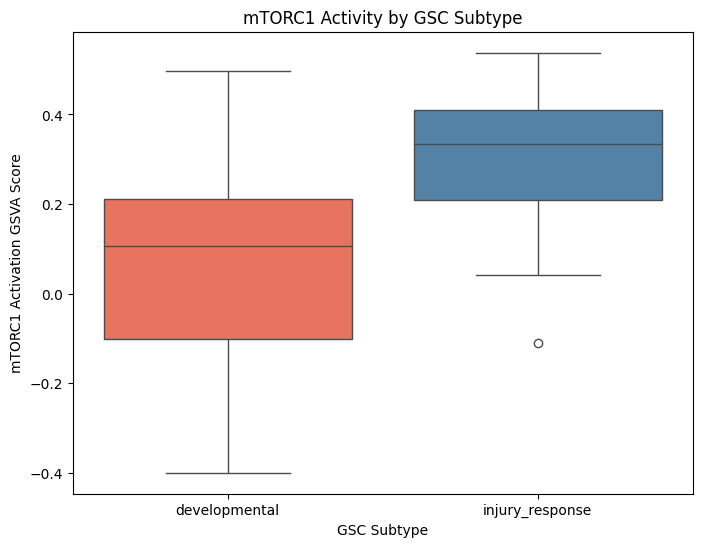

In [11]:
# Perform statistical analysis (e.g., t-test) to compare mTORC1 activity between developmental and injury_response subtypes
from scipy import stats
dev_mtorc1 = gsva_results_filtered[gsva_results_filtered['subtype'] == 'developmental']['mTORC1_activation_gs']
ir_mtorc1 = gsva_results_filtered[gsva_results_filtered['subtype'] == 'injury_response']['mTORC1_activation_gs']
t_stat, p_value = stats.ttest_ind(dev_mtorc1, ir_mtorc1)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


# Visualize the results using a boxplot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='subtype',
    y='mTORC1_activation_gs',
    data=gsva_results_filtered,
    palette= ['#FF6347', '#4682B4']
)
plt.title('mTORC1 Activity by GSC Subtype')
plt.xlabel('GSC Subtype')
plt.ylabel('mTORC1 Activation GSVA Score')
plt.show()
